In [1]:
import os
os.chdir('/home/solozabal/Documents/projects/TFBind')

In [2]:
import numpy as np
import pandas as pd

In [3]:
TF = 'MITF'

df = pd.read_csv(f'datasets/{TF}/dataset_{TF}_encoded.csv')

In [4]:
df

,Change,Position,ln(I),Plus_strand,Minus_strand,Groove_major,Groove_minor
0,AA,1,-0.312518,ATATCACGTGATAC,GTATCACGTGATAA,"[['A', 'D', 'D', 'A'], ['M', 'A', 'D', 'A'], [...","[['A', 'n', 'n', 'A'], ['x', 'A', 'n', 'A'], [..."
1,AA,2,-0.021256,GAATCACGTGATAC,GTATCACGTGATAC,"[['A', 'A', 'D', 'n'], ['A', 'D', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['A', 'n', 'n', 'A'], [..."
2,AA,3,-0.528420,GTATCACGTGATAC,GTATCACGTGAAAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
3,AA,4,-1.084303,GTAACACGTGATAC,GTATCACGTGATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
4,AA,5,-2.494835,GTATAACGTGATAC,GTATCACGTAATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
...,...,...,...,...,...,...,...
1257,gg,10,-1.605242,GTATCACGTgATAC,GTATgACGTGATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
1258,gg,11,-1.391758,GTATCACGTGgTAC,GTAgCACGTGATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
1259,gg,12,-0.879398,GTATCACGTGAgAC,GTgTCACGTGATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
1260,gg,13,-0.252286,GTATCACGTGATgC,GgATCACGTGATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."


In [5]:
from src.utils import categorize_change

df["Category"] = df["Change"].apply(categorize_change)

In [6]:
from ast import literal_eval
from src.encode import one_hot_encode_grooves


def parse_literal(value):
    return value if isinstance(value, list) else literal_eval(value)

df["Groove_major"] = df["Groove_major"].map(parse_literal)
df["Groove_minor"] = df["Groove_minor"].map(parse_literal)
df["Groove_major_OH"], df["Groove_minor_OH"] = zip(
    *df.apply(lambda r: one_hot_encode_grooves(r["Groove_major"], r["Groove_minor"]), axis=1)
)

In [7]:
df

,Change,Position,ln(I),Plus_strand,Minus_strand,Groove_major,Groove_minor,Category,Groove_major_OH,Groove_minor_OH
0,AA,1,-0.312518,ATATCACGTGATAC,GTATCACGTGATAA,"[[A, D, D, A], [M, A, D, A], [A, D, A, M], [M,...","[[A, n, n, A], [x, A, n, A], [A, n, A, x], [x,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 0], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [0..."
1,AA,2,-0.021256,GAATCACGTGATAC,GTATCACGTGATAC,"[[A, A, D, n], [A, D, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [A, n, n, A], [A, n, A, x], [x,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
2,AA,3,-0.528420,GTATCACGTGATAC,GTATCACGTGAAAC,"[[A, A, D, n], [M, A, D, A], [A, D, D, A], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, n, A], [x,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
3,AA,4,-1.084303,GTAACACGTGATAC,GTATCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [A,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [A,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
4,AA,5,-2.494835,GTATAACGTGATAC,GTATCACGTAATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
...,...,...,...,...,...,...,...,...,...,...
1257,gg,10,-1.605242,GTATCACGTgATAC,GTATgACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
1258,gg,11,-1.391758,GTATCACGTGgTAC,GTAgCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
1259,gg,12,-0.879398,GTATCACGTGAgAC,GTgTCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
1260,gg,13,-0.252286,GTATCACGTGATgC,GgATCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."


In [8]:
# Create X_train by concatenating Groove_major_OH and Groove_minor_OH along axis=1
X = np.stack([
    np.concatenate([np.asarray(mj, dtype=np.int8), np.asarray(mn, dtype=np.int8)], axis=1)
    for mj, mn in zip(df["Groove_major_OH"], df["Groove_minor_OH"])
], axis=0).astype(np.float32)

df["encoded_sequence"] = list(X)

In [9]:
df.iloc[0]["encoded_sequence"].shape

(14, 8, 4)

In [10]:
from sklearn.model_selection import train_test_split

split = 0.3
df_train, df_test = train_test_split(df, test_size=split, random_state=0)

In [11]:
# Create training and testing datasets
X_train = np.stack(df_train["encoded_sequence"].to_numpy(), axis=0)
y_train = df_train["ln(I)"].to_numpy()

X_test = np.stack(df_test["encoded_sequence"].to_numpy(), axis=0)
y_test = df_test["ln(I)"].to_numpy()

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((883, 14, 8, 4), (883,), (379, 14, 8, 4), (379,))

In [13]:
# Flatten encoded groove tensors for linear model
n_samples, seq_length, n_features, n_encoding = X_train.shape
X_train = X_train.reshape((n_samples, seq_length * n_features * n_encoding))

X_test = X_test.reshape((X_test.shape[0], seq_length * n_features * n_encoding))

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [15]:
linear_reg = LinearRegression()
linear_reg

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
linear_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
score = linear_reg.score(X_train, y_train)
score

0.8838431630609086

In [18]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
kf_cv_scores = cross_val_score(linear_reg, X_train, y_train, cv=kfold)
kf_cv_scores.mean()

np.float64(0.8134390484157092)

In [19]:
ypred = linear_reg.predict(X_test)
mae = mean_absolute_error(y_test, ypred)
mse = mean_squared_error(y_test, ypred)

mae, mse

(0.24536854790169368, 0.10858613818062454)

In [20]:
df_test['y_pred'] = ypred

In [21]:
df_test

,Change,Position,ln(I),Plus_strand,Minus_strand,Groove_major,Groove_minor,Category,Groove_major_OH,Groove_minor_OH,encoded_sequence,y_pred
5,AA,6,-1.470603,GTATCACGTGATAC,GTATCACGAGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",-1.426596
364,DX,11,-0.762346,GTATCACGTGDTAC,GTAXCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",-0.989918
52,AI,5,-1.856286,GTATAACGTGATAC,GTATCACGTIATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",I,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",-1.654390
990,XG,1,-0.241069,XTATCACGTGATAC,GTATCACGTGATAG,"[[M, D, A, A], [M, A, D, A], [A, D, A, M], [M,...","[[x, A, D, A], [x, A, n, A], [A, n, A, x], [x,...",5mC,"[[[0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0...","[[[0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], ...",-0.193963
186,CG,10,-2.033387,GTATCACGTCATAC,GTATGACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",-2.195172
...,...,...,...,...,...,...,...,...,...,...,...,...
110,AX,10,-2.342949,GTATCACGTAATAC,GTATXACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",5mC,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",-2.069570
1027,XX,2,-0.138246,GXATCACGTGATAC,GTATCACGTGATXC,"[[A, A, D, n], [M, D, D, M], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, A, x], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",-0.176867
500,Gg,9,-1.747387,GTATCACGGGATAC,GTATCgCGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",7dG,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",-1.839092
1072,aG,7,-1.123645,GTATCAaGTGATAC,GTATCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",7dA,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",-1.428298


In [22]:
from sklearn.metrics import r2_score

y_pred = df_test['y_pred']
r2 = r2_score(y_test, y_pred)
r2

0.8387152654839035

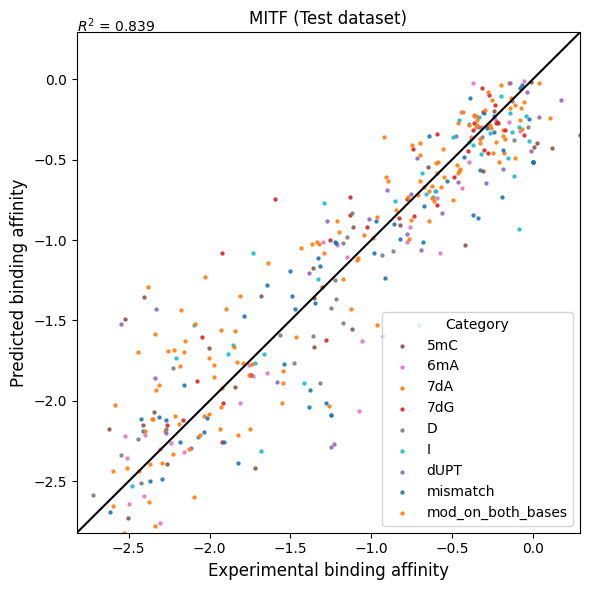

In [23]:
from matplotlib import pyplot as plt

# Ensure Category exists (uses existing categorize_change if needed)
if "Category" not in df_test.columns:
    df_test["Category"] = df_test["Change"].apply(categorize_change)

# Color map per category
colors = {
    "none": "#1f77b4",
    "I": "#17becf",
    "D": "#7f7f7f",
    "6mA": "#e377c2",
    "7dA": "#ff7f0e",
    "7dG": "#d62728",
    "dUPT": "#9467bd",
    "5mC": "#8c564b",
    "both": "#bcbd22",
}

plt.figure(figsize=(6, 6))

# Scatter per category
for cat, g in df_test.groupby("Category"):
    plt.scatter(g["ln(I)"], g["y_pred"], s=18, marker='.', alpha=0.85,
                label=cat, c=colors.get(cat, None))

plt.xlabel('Experimental binding affinity', fontsize=12)
plt.ylabel('Predicted binding affinity', fontsize=12)

p1 = max(max(ypred), max(y_test))
p2 = min(min(ypred), min(y_test))
plt.xlim([p2, p1])
plt.ylim([p2, p1])
plt.plot([p2, p1], [p2, p1], 'k-')

plt.annotate("$R^2$ = {:.3f}".format(r2), (p2, p1))
plt.legend(loc='lower right', title="Category")
plt.title(f'{TF} (Test dataset)', fontsize=12)

plt.tight_layout()
# Save pdf
plt.savefig(f'plots/{TF}_linear_regression_test.pdf')